In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [7]:
df = pd.read_csv("../data/clean_airbnb_data.csv")

In [8]:
X = df.drop('price',axis=1)
y = df["price"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(5657, 31)

In [17]:
X_test_scaled.shape

(1415, 31)

In [21]:
model = Sequential()

model.add(Dense(31,activation='relu'))
model.add(Dense(31,activation='relu'))
model.add(Dense(31,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,             
    restore_best_weights=True
)

In [24]:
model.fit(x=X_train_scaled,y=y_train.values,
          validation_split=0.2,
          validation_data=(X_test_scaled,y_test.values),
          batch_size=64,
          callbacks=[early_stop],
          epochs=200,
          verbose=1)

Epoch 1/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 25225.6895 - mae: 131.8254 - val_loss: 20847.9668 - val_mae: 109.2606
Epoch 2/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11954.1133 - mae: 75.4625 - val_loss: 5123.5469 - val_mae: 43.9614
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4312.8638 - mae: 41.7559 - val_loss: 4958.6606 - val_mae: 42.6495
Epoch 4/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4019.5449 - mae: 40.2841 - val_loss: 4938.9624 - val_mae: 42.3539
Epoch 5/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3667.3411 - mae: 38.6172 - val_loss: 4866.8242 - val_mae: 42.8183
Epoch 6/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3864.4832 - mae: 39.4389 - val_loss: 4835.7974 - val_mae: 42.2602
Epoch 7/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3621.3799 - mae: 39.3835 - val_loss: 4818.4736 - val_mae: 42.0298
Epoch 8/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4045.5774 - mae: 40.2478 - val_loss: 4791.3335 - val_mae: 41.

In [25]:
losses = pd.DataFrame(model.history.history)

<Axes: >

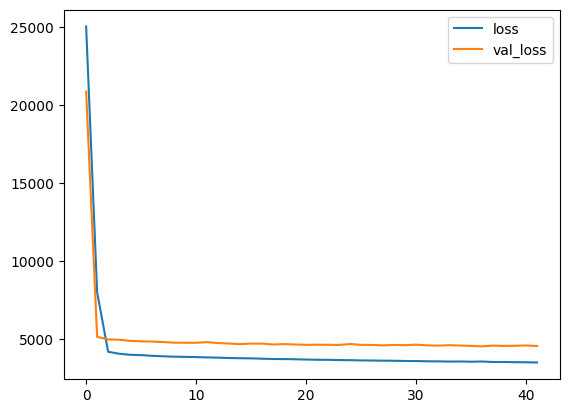

In [27]:
losses[['loss','val_loss']].plot()

In [38]:
y_pred_nn = model.predict(X_test_scaled).flatten()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

In [40]:
print("📈 Neural Network Results:")
print(f"MAE:  {mae_nn:.2f}")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R²:   {r2_nn:.2f}")

📈 Neural Network Results:
MAE:  40.72
RMSE: 67.19
R²:   0.56


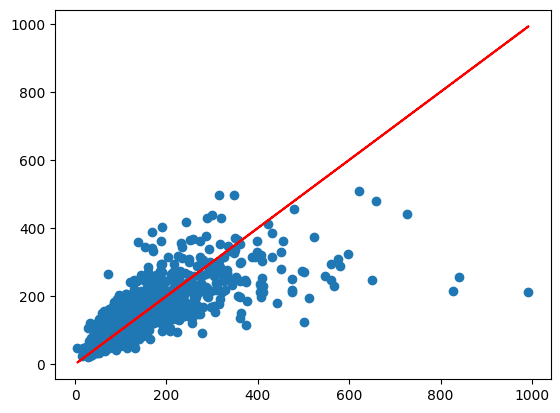

In [56]:
# Our predictions
plt.scatter(y_test,y_pred_nn)

# Perfect predictions
plt.plot(y_test,y_test,'r')